## Notes - Aims + Objectives

This dataset is focused on the relationship between physical activity and depression - therefore, physical activity can be used as an indicator for depression among other features. Montgomery-Asberg Depression Rating Scale (MADRS) is a psycometric tool used to asses the severity of depression in adults. 

In [1]:
import pandas as pd

## Condition Dataset

Read in an inital set from the condition macroset. Then iterate through all condtions and append to a condition master set with column 'set' denoting the ID of the respective set. The same is then applied for all control sets. Scores could be aggregating to the same sets however the timeseries data would need to be presented cumulativly - not sure if this is representative of MADRS

In [290]:
''' Import all condition datasets '''

condition_df = pd.DataFrame()

for i in range(1,23):
    filename = 'condition_' + str(i)
    filepath = 'data/condition/' + filename + '.csv'
    
    df = pd.read_csv(filepath)
    df['set'] = filename
    condition_df = condition_df.append(df)

condition_df.shape

(520231, 4)

In [291]:
condition_df.dtypes

timestamp    object
date         object
activity      int64
set          object
dtype: object

In [292]:
condition_df['timestamp'] = pd.to_datetime(condition_df['timestamp'], format='%Y%m%d %H:%M:%S')

#https://strftime.org/

AttributeError: Can only use .dt accessor with datetimelike values

In [293]:
condition_df.dtypes

timestamp    datetime64[ns]
date                 object
activity              int64
set                  object
dtype: object

In [294]:
condition_df.reset_index(drop=True)

,timestamp,date,activity,set
0,2003-05-07 12:00:00,2003-05-07,0,condition_1
1,2003-05-07 12:01:00,2003-05-07,143,condition_1
2,2003-05-07 12:02:00,2003-05-07,0,condition_1
3,2003-05-07 12:03:00,2003-05-07,20,condition_1
4,2003-05-07 12:04:00,2003-05-07,166,condition_1
...,...,...,...,...
520226,2002-11-20 13:32:00,2002-11-20,0,condition_22
520227,2002-11-20 13:33:00,2002-11-20,0,condition_22
520228,2002-11-20 13:34:00,2002-11-20,7,condition_22
520229,2002-11-20 13:35:00,2002-11-20,0,condition_22


In [295]:
condition_df.head()

,timestamp,date,activity,set
0,2003-05-07 12:00:00,2003-05-07,0,condition_1
1,2003-05-07 12:01:00,2003-05-07,143,condition_1
2,2003-05-07 12:02:00,2003-05-07,0,condition_1
3,2003-05-07 12:03:00,2003-05-07,20,condition_1
4,2003-05-07 12:04:00,2003-05-07,166,condition_1


In [296]:
condition_df.describe()

,activity
count,520231.000000
mean,160.689932
std,318.334497
min,0.000000
25%,0.000000
50%,7.000000
75%,178.000000
max,8000.000000


In [297]:
condition_df.isnull().any()

timestamp    False
date         False
activity     False
set          False
dtype: bool

In [298]:
condition_df['set'].unique()

array(['condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'condition_6', 'condition_7', 'condition_8',
       'condition_9', 'condition_10', 'condition_11', 'condition_12',
       'condition_13', 'condition_14', 'condition_15', 'condition_16',
       'condition_17', 'condition_18', 'condition_19', 'condition_20',
       'condition_21', 'condition_22'], dtype=object)

What does the daily mean, 30 day mean, and cumulative total of each subset look like?

In [299]:
condition_1 = condition_df.loc[(condition_df['date'] == '2003-05-07') & (condition_df['set'] == 'condition_1')]
condition_2 = condition_df.loc[(condition_df['date'] == '2003-05-07') & (condition_df['set'] == 'condition_2')]

In [300]:
condition_1.dtypes

timestamp    datetime64[ns]
date                 object
activity              int64
set                  object
dtype: object

In [301]:
condition_1.head()

,timestamp,date,activity,set
0,2003-05-07 12:00:00,2003-05-07,0,condition_1
1,2003-05-07 12:01:00,2003-05-07,143,condition_1
2,2003-05-07 12:02:00,2003-05-07,0,condition_1
3,2003-05-07 12:03:00,2003-05-07,20,condition_1
4,2003-05-07 12:04:00,2003-05-07,166,condition_1


Text(0.5, 1.0, '24hour activity over time Condition_2')

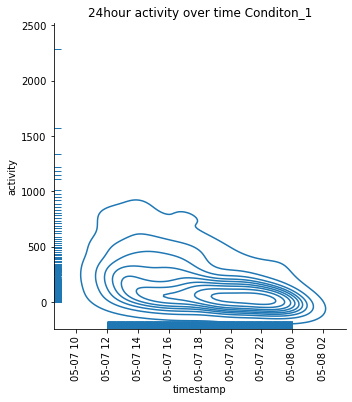

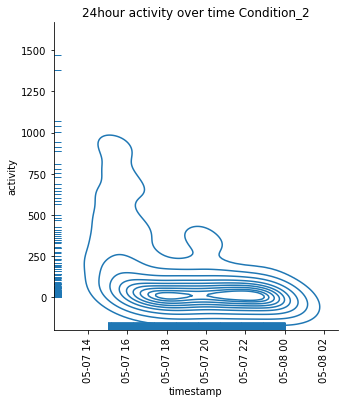

In [302]:
''' Should look at some control stuff here '''

sns.displot(data=condition_1,
            x="timestamp", 
            y="activity",
            kind='kde',
            rug=True,)

plt.xticks(rotation=90)
plt.title('24hour activity over time Conditon_1')

sns.displot(data=condition_2,
            x="timestamp", 
            y="activity",
            kind='kde',
            rug=True,)

plt.xticks(rotation=90)
plt.title('24hour activity over time Condition_2')

In [314]:
condition_1.head()

,timestamp,date,activity,set
0,2003-05-07 12:00:00,2003-05-07,0,condition_1
1,2003-05-07 12:01:00,2003-05-07,143,condition_1
2,2003-05-07 12:02:00,2003-05-07,0,condition_1
3,2003-05-07 12:03:00,2003-05-07,20,condition_1
4,2003-05-07 12:04:00,2003-05-07,166,condition_1


In [315]:
condition_1.dtypes

timestamp    datetime64[ns]
date                 object
activity              int64
set                  object
dtype: object

In [317]:
files = condition_df['set'].unique()

In [318]:
files

array(['condition_1', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'condition_6', 'condition_7', 'condition_8',
       'condition_9', 'condition_10', 'condition_11', 'condition_12',
       'condition_13', 'condition_14', 'condition_15', 'condition_16',
       'condition_17', 'condition_18', 'condition_19', 'condition_20',
       'condition_21', 'condition_22'], dtype=object)

In [319]:
condition_1 = condition_df.loc[condition_df['set'] == 'condition_1']

In [361]:
daily_mean_activity = pd.DataFrame()
intra_day_mean_activity = pd.DataFrame()

for condition_set in files:
    activity_temp = pd.DataFrame()
    daily_subsample = condition_df.loc[condition_df['set'] == condition_set]
    dates = daily_subsample['date'].unique()
    for date in dates:
        date_range_subset = daily_subsample.loc[daily_subsample['date'] == date]

        metrics = date_range_subset.describe()
        d_count = round(metrics['activity'][0],0)
        d_mean = round(metrics['activity'][1],2)
        d_std = round(metrics['activity'][2],2)
        d_min = round(metrics['activity'][3],2)
        d_25 = round(metrics['activity'][4],2)
        d_50 = round(metrics['activity'][5],2)
        d_75 = round(metrics['activity'][6],2)
        d_max = round(metrics['activity'][7],2)

        new_date = date

        #daily_activity = round(daily_subsample['activity'].mean(), 2)
        new_row = {'date': new_date, 
                   'activity 24hr mean': d_mean,
                   'activity 24hr events': d_count,
                   'activity 24hr std': d_std,
                   'activity 24hr min': d_min,
                   'activity 24hr 25%': d_25,
                   'activity 24hr 50%': d_50,
                   'activity 24hr 75%': d_75,
                   'activity 24hr max': d_max,
                   'set':daily_subsample['set'][0]}
        activity_temp = activity_temp.append(new_row, ignore_index=True)
        intra_day_mean_activity = intra_day_mean_activity.append(new_row, ignore_index = True)
    
    daily_activity_mean = round(activity_temp['activity 24hr mean'].mean(),2)
    daily_activity_events = round(activity_temp['activity 24hr events'].mean(),2)
    daily_activity_std = round(activity_temp['activity 24hr std'].mean(),2)
    daily_activity_min = round(activity_temp['activity 24hr min'].mean(),2)
    daily_activity_25 = round(activity_temp['activity 24hr 25%'].mean(),2)
    daily_activity_50 = round(activity_temp['activity 24hr 50%'].mean(),2)
    daily_activity_75 = round(activity_temp['activity 24hr 75%'].mean(),2)
    daily_activity_max = round(activity_temp['activity 24hr max'].mean(),2)
    
    row_agg = {'daily_activity_mean': daily_activity_mean,
                   'daily_activity_events': daily_activity_events,
                   'daily_activity_std': daily_activity_std,
                   'daily_activity_min': daily_activity_min,
                   'daily_activity_25': daily_activity_25,
                   'daily_activity_50': daily_activity_50,
                   'daily_activity_75': daily_activity_75,
                   'daily_activity_max': daily_activity_max,
                   'set':condition_set}
    daily_mean_activity = daily_mean_activity.append(row_agg, ignore_index=True)

### Daily mean activity for depression cases

In [362]:
daily_mean_activity

,daily_activity_mean,daily_activity_events,daily_activity_std,daily_activity_min,daily_activity_25,daily_activity_50,daily_activity_75,daily_activity_max,set
0,144.71,1367.29,259.64,0.00,0.65,21.82,186.79,2065.71,condition_1
1,150.96,1390.21,252.46,4.04,5.25,29.36,192.35,1854.50,condition_2
2,251.41,1353.00,364.08,3.38,5.69,76.97,373.11,2639.50,condition_3
3,264.05,1347.25,370.86,0.00,1.05,127.16,389.59,3130.50,condition_4
4,160.30,1343.31,277.02,0.00,0.00,34.06,197.06,2393.62,condition_5
5,195.16,1339.56,317.44,0.00,3.69,43.00,271.02,2476.38,condition_6
6,258.88,1385.94,388.21,0.00,0.66,69.75,422.39,2881.19,condition_7
7,187.94,1378.50,371.31,0.00,1.21,34.96,208.71,3613.43,condition_8
8,181.74,1354.53,306.13,0.00,3.33,41.73,225.10,2222.67,condition_9
9,278.41,1347.19,374.07,0.00,0.00,135.56,415.81,2541.38,condition_10


Text(0.5, 1.0, 'Daily Activity 24Hr 25%, 50%, 75%')

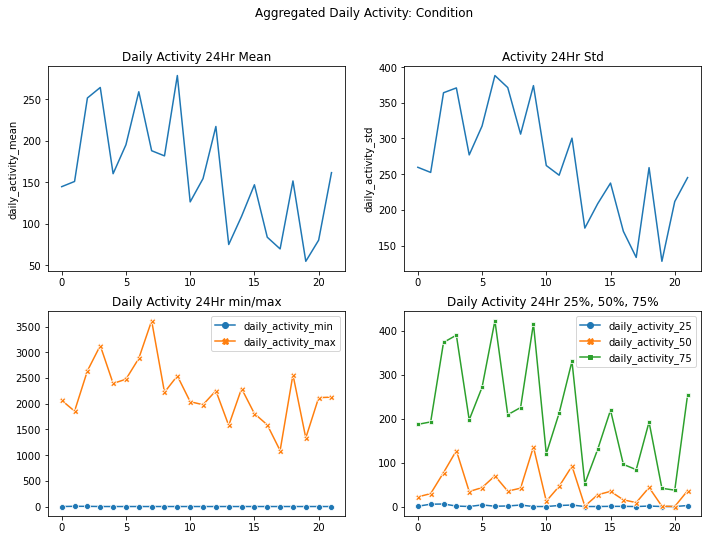

In [364]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(2,2, figsize=a4_dims)
fig.suptitle("Aggregated Daily Activity: Condition")

#plt.title('Aggregated Daily Activity')
# activity mean
sns.lineplot(ax=ax[0][0],
            data=daily_mean_activity['daily_activity_mean'],
            markers = True,
            dashes=False)
ax[0][0].set_title('Daily Activity 24Hr Mean')

# standard deviation
sns.lineplot(ax=ax[0][1],
            data=daily_mean_activity['daily_activity_std'],
            markers = True,
            dashes=False,)
ax[0][1].set_title('Activity 24Hr Std')

#min max
sns.lineplot(ax=ax[1][0],
            data=daily_mean_activity[['daily_activity_min','daily_activity_max']],
            markers = True,
            dashes=False,)
ax[1][0].set_title('Daily Activity 24Hr min/max')

# iqrs
sns.lineplot(ax=ax[1][1],
            data=daily_mean_activity[['daily_activity_25','daily_activity_50','daily_activity_75']],
            markers = True,
            dashes=False,)
ax[1][1].set_title('Daily Activity 24Hr 25%, 50%, 75%')


#plt.xticks(rotation=90)

#### Intra day activity for depression

### Control Dataset

In [12]:
''' Import all control datasets ''' 

control_df = pd.DataFrame()

for i in range(1,32):
    filename = 'control_' + str(i)
    filepath = 'data/control/' + filename + '.csv'
    
    df = pd.read_csv(filepath)
    df['set'] = filename
    control_df = control_df.append(df)

control_df.shape

(968371, 4)

In [13]:
control_df.reset_index(drop = True)

,timestamp,date,activity,set
0,2003-03-18 15:00:00,2003-03-18,60,control_1
1,2003-03-18 15:01:00,2003-03-18,0,control_1
2,2003-03-18 15:02:00,2003-03-18,264,control_1
3,2003-03-18 15:03:00,2003-03-18,662,control_1
4,2003-03-18 15:04:00,2003-03-18,293,control_1
...,...,...,...,...
968366,2003-04-23 08:24:00,2003-04-23,0,control_31
968367,2003-04-23 08:25:00,2003-04-23,12,control_31
968368,2003-04-23 08:26:00,2003-04-23,178,control_31
968369,2003-04-23 08:27:00,2003-04-23,0,control_31


In [14]:
control_df['set'].unique()

array(['control_1', 'control_2', 'control_3', 'control_4', 'control_5',
       'control_6', 'control_7', 'control_8', 'control_9', 'control_10',
       'control_11', 'control_12', 'control_13', 'control_14',
       'control_15', 'control_16', 'control_17', 'control_18',
       'control_19', 'control_20', 'control_21', 'control_22',
       'control_23', 'control_24', 'control_25', 'control_26',
       'control_27', 'control_28', 'control_29', 'control_30',
       'control_31'], dtype=object)

In [15]:
control_df.head()

,timestamp,date,activity,set
0,2003-03-18 15:00:00,2003-03-18,60,control_1
1,2003-03-18 15:01:00,2003-03-18,0,control_1
2,2003-03-18 15:02:00,2003-03-18,264,control_1
3,2003-03-18 15:03:00,2003-03-18,662,control_1
4,2003-03-18 15:04:00,2003-03-18,293,control_1


In [16]:
control_df.describe()

,activity
count,968371.000000
mean,194.889495
std,384.662806
min,0.000000
25%,0.000000
50%,4.000000
75%,231.000000
max,8000.000000


In [17]:
control_df.isnull().any()

timestamp    False
date         False
activity     False
set          False
dtype: bool

## Merged dataset

In [38]:
frames = [control_df, condition_df]
merged_df = pd.concat(frames)

In [39]:
merged_df.shape

(1488602, 4)

In [40]:
merged_df.reset_index(drop=True)

,timestamp,date,activity,set
0,2003-03-18 15:00:00,2003-03-18,60,control_1
1,2003-03-18 15:01:00,2003-03-18,0,control_1
2,2003-03-18 15:02:00,2003-03-18,264,control_1
3,2003-03-18 15:03:00,2003-03-18,662,control_1
4,2003-03-18 15:04:00,2003-03-18,293,control_1
...,...,...,...,...
1488597,2002-11-20 13:32:00,2002-11-20,0,condition_22
1488598,2002-11-20 13:33:00,2002-11-20,0,condition_22
1488599,2002-11-20 13:34:00,2002-11-20,7,condition_22
1488600,2002-11-20 13:35:00,2002-11-20,0,condition_22


## Exploratroy data analysis

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# 1st control and condition dfs
# sample_control = merged_df.loc[(merged_df['date'] > '2003-03-01') & (merged_df['date'] < '2003-04-01')]
sample_condition_2 = merged_df.loc[merged_df['set'] == 'condition_2']
sample_condition_1 = merged_df.loc[merged_df['set'] == 'condition_1']
sample_control_1 = merged_df.loc[merged_df['set'] == 'control_1']
sample_control_2 = merged_df.loc[merged_df['set'] == 'control_2']

AttributeError: 'numpy.ndarray' object has no attribute 'yaxis'

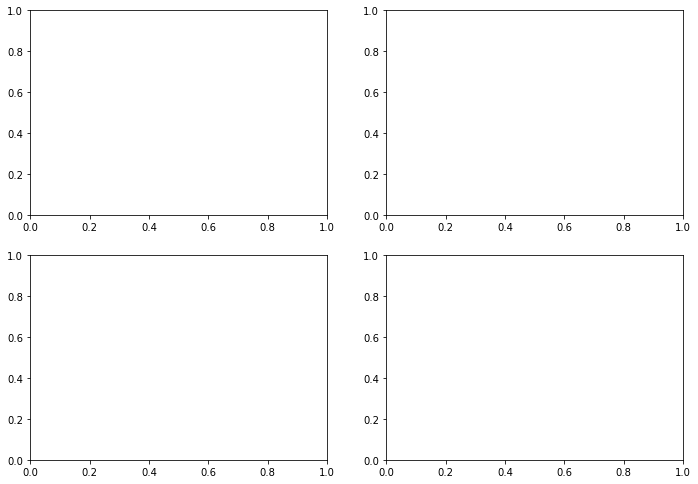

In [91]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(2,2,figsize=a4_dims)

sns.lineplot(ax=ax,
             data=sample_condition_1,
             #x="date", 
             #y="activity",
             #hue = 'set',
            markers = True,
            dashes=False)

sns.lineplot(ax=ax,
             data=sample_condition_2,
             #x="date", 
             #y="activity",
             #hue = 'set',
            markers = True,
            dashes=False)

sns.lineplot(ax=ax,
             data=sample_control_1,
             #x="date", 
             #y="activity",
             #hue = 'set',
            markers = True,
            dashes=False)

sns.lineplot(ax=ax,
             data=sample_control_2,
             #x="date", 
             #y="activity",
             #hue = 'set',
            markers = True,
            dashes=False)

# sns.lineplot(ax=ax,
#              data=sample_condition,
#              x="date", 
#              y="activity",
#             markers = True,
#             dashes=False)

# sns.distplot(sample_control, ax=ax)
# sns.distplot(sample_condition, ax=ax)

plt.title('Daily activity over time')
plt.xticks(rotation=90)